## Quelques calculs autour de Fourier

On considère la fonction 
$$f(x) = \left\{ \begin{array}{ccc} 0 & \mbox{si} & -\pi\leq x \leq 0 \\ 2 &\mbox{si} & 0\leq x\leq \pi \end{array} \right.$$

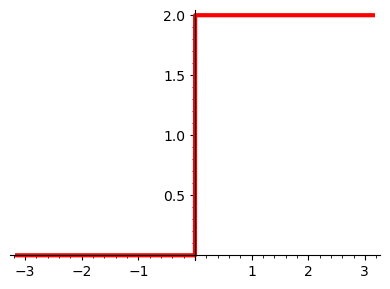

In [18]:
L = pi
f1(x) = 0
f2(x) = 2
f = piecewise([[(-L,0),f1],[(0,L),f2]])
plot(f, -pi,pi, color = "red", thickness = 3, figsize = 4)

On a trois commandes utiles pour travailler avc les séries de fourier
* `f.fourier_series_sine_coefficient(j,L)`,
* `f.fourier_series_cosine_coefficient(j,L)`,
* `f.fourier_series_partial_sum(j, L)`

Dans chaque cas, on doit avoir définie une fonction `f`, puis `j` indique quel est l'ordre du coefficient qu'on veut, comme dans $a_j$, et `L` est la demi-période.

Ci bas on calcule :
+ $a_j$ pour $j$ allant de $0$ à $5$
+ $b_j$ pour $j$ allant de $0$ à $5$
+ La somme de la série de fourier jusqu'à $n=3$

In [19]:
A = [f.fourier_series_cosine_coefficient(j, L) for j in range(6)]
B = [f.fourier_series_sine_coefficient(j, L) for j in range(6)]
F = f.fourier_series_partial_sum(3, L)
show(A)
show(B)
show(F)

[2, 0, 0, 0, 0, 0]

[0, 4/pi, 0, 4/3/pi, 0, 4/5/pi]

4/3*sin(3*x)/pi + 4*sin(x)/pi + 1

La figure montrée classe a été obtenue avec le code ci-après.

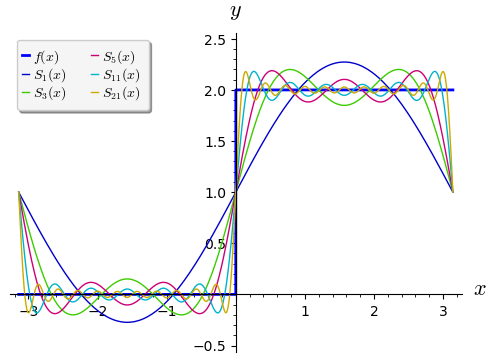

In [20]:
L = pi
f1(x) = 0
f2(x) = 2
f = piecewise([[(-L,0),f1],[(0,L),f2]])
F1 = f.fourier_series_partial_sum(1, L)
F3 = f.fourier_series_partial_sum(3, L)
F5 = f.fourier_series_partial_sum(5, L)
F11 = f.fourier_series_partial_sum(11, L)
F21 = f.fourier_series_partial_sum(21, L)
Fig = plot(f,-L, L, color = "blue", thickness = 2.0, legend_label="$f(x)$")
Fig += plot([F1,F3,F5,F11, F21], (x,-L,L), ymin = -0.5, ymax=2.5, 
            legend_label=["$S_1(x)$", "$S_3(x)$", "$S_5(x)$", "$S_{11}(x)$", "$S_{21}(x)$"],
             axes_labels=['$x$','$y$'])
Fig.set_legend_options(ncol=2,back_color='whitesmoke',fancybox=true,loc=2)
show(Fig, figsize = 5)

## Exemple 2
On s'intéresse ;a la fonction $f(x) = x$ sur l'intervalle $[0,1]$. Le domaine de $f$ n'est pas symétrique, on ne peut donc pas parler de parité. On peut étendre $f$ à $[-1,1]$ d'au moins trois façons
1. On pourrait poser $f(x) = 0$ si $x\in [-1,1]$
2. On pourrait prolonger $f$ de sorte à obtenir une fonction paire : donc $f(x) = |x|$ sur $[-1,1]$,
3. On pourrait prolonger $f$ de sorte à obtenir une fonction impaire : donc $f(x) = x$ sur $[-1,1]$.

Voyons les cas 2 et 3.

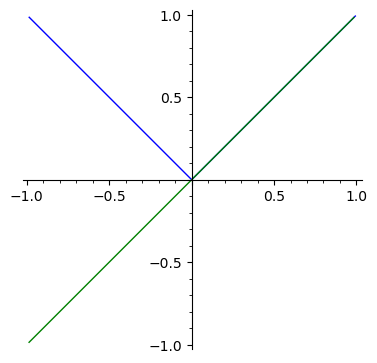

In [21]:
f1(x)=-x
f2(x)=x
f = piecewise([[(-1,0),f1],[(0,1),f2]])
g= piecewise([[(-1,0),f2],[(0,1),f2]])
Cf=plot(f, color='blue')
Cg=plot(g, color='green')
show(Cf+Cg,aspect_ratio=1,figsize=5)

In [22]:
@interact
def _(j=(2..20)):
    F = f.fourier_series_partial_sum(j,1)
    CourbeF=plot(F,-2,2,color='red', thickness=1)
    show(Cf + CourbeF, aspect_ratio=1,figsize=6)
    G = g.fourier_series_partial_sum(j,1)
    CourbeG=plot(G,-2,2,color='red', thickness=1)
    show(Cg+CourbeG,aspect_ratio=1,figsize=6)

Interactive function <function _ at 0x7f4c8d9a2dc0> with 1 widget
  j: SelectionSlider(description='j', options=(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20), value=2)

On voit notamment que la série pour le prolongement pair converge plus rapidement que celle pour le prolongement pair. Voyons un peu pourquoi :

In [23]:
CoefPair = [f.fourier_series_cosine_coefficient(j,1) for j in range(10)]
show(CoefPair)
CoefImpair  = [g.fourier_series_sine_coefficient(j,1) for j in range(10)]
show(CoefImpair)

[1, -4/pi^2, 0, -4/9/pi^2, 0, -4/25/pi^2, 0, -4/49/pi^2, 0, -4/81/pi^2]

[0, 2/pi, -1/pi, 2/3/pi, -1/2/pi, 2/5/pi, -1/3/pi, 2/7/pi, -1/4/pi, 2/9/pi]

Dans le prolongement pair on aun terme en $1/n^2$, tandis que dans le prolongement impair le terme est $1/m$ seulement.

In [27]:
var('n')
assume(n, "integer")

In [30]:
%display typeset
integrate(abs(x)*cos(n*pi*x),x,-1,1)

Warning, integration of abs or sign assumes constant sign by intervals (correct if the argument is real):
Check [abs(sageVARx)]
No checks were made for singular points of antiderivative sign(sageVARx)*cos(pi*sageVARn*sageVARx)/pi^2/sageVARn^2+sageVARx*sign(sageVARx)*sin(pi*sageVARn*sageVARx)/pi/sageVARn-1/pi^2/sageVARn^2*sign(sageVARx) for definite integration in [-1,1]


2*(cos(pi*n) - 1)/(pi^2*n^2)

### Exemple
On considère une tige de longueur $L=50\, cm$. À l'instant initial elle a une température constante égale à $20^\circ C$. Pour étudier la température on doite résoudre

$$\left\{\begin{array}{lcl} \frac{\partial u}{\partial t} & = & \alpha^2 \frac{\partial^2 u}{\partial x^2}\\ u(0,t) &= & 0\\ u(l,t) & = & 0\\ u(x,0)& =& 20^\circ \end{array} \right.$$

Pour faire simple, supposons $\alpha^2 = 1$.


In [1]:
var('x,t')
U=[1/n*(1-(-1)^n)*sin(n*pi*x/50)*exp(-(n^2*pi^2/50^2)*t) for n in range(1,31)]
u(x,t)=40/pi*sum(U)
def macouleur(t,x):
    return float(u(t,x)/20)
Fig = plot3d(u,(x,0,50),(t,0,500),color=(macouleur,colormaps.Spectral) ) 
show(Fig, aspect_ratio = [10,1,10])

Graphics3d Object